In [20]:
# 데이터처리 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 모델 선언
from sklearn.cluster import KMeans

In [27]:
# 데이터 불러오기
stData = \
pd.read_csv("../../stddev/dataset/student_middle_result.csv", encoding = "utf-8")

In [9]:
stData

,ST_NO,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20
5,ST0006,100,80,30
6,ST0007,15,10,30
7,ST0008,100,100,33
8,ST0009,65,60,35
9,ST0010,90,20,38


In [11]:
stData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ST_NO   26 non-null     object
 1   SW      26 non-null     int64 
 2   DB      26 non-null     int64 
 3   AND     26 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


In [14]:
stData.shape

(26, 4)

In [19]:
stData.describe()

,SW,DB,AND
count,26.000000,26.000000,26.000000
mean,85.384615,69.807692,50.230769
std,24.162909,31.764155,29.906933
min,15.000000,10.000000,0.000000
25%,90.000000,46.250000,30.750000
50%,92.500000,80.000000,47.500000
75%,100.000000,100.000000,66.750000
max,100.000000,100.000000,100.000000


C:\Users\SMART-19\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AND', ylabel='Density'>

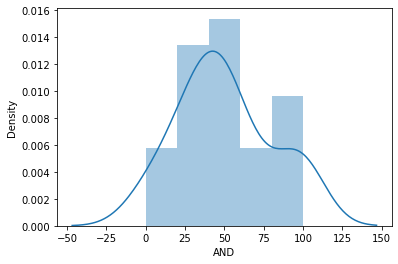

In [24]:
sns.distplot(stData.AND)

# 1. 타입 통합/ 숫자형 컬럼 추가

In [28]:
stData = stData.astype({"SW" : int,
              "DB" : int,
              "AND" : int})

# 2. 모델 선언/학습

In [30]:
featuresColumns = ["SW","DB","AND"]

In [31]:
features = stData.loc[:,featuresColumns]

In [44]:
# random_state내 PC에서 항상 같은 값이 나오도록 고정
# n_clusters 집단의 개수를 정하는 파라미터
model_method = KMeans(random_state=1, n_clusters=2)

In [45]:
model = model_method.fit(features)

# 3. 예측

In [46]:
predictValue = model.predict(features)

In [47]:
len(predictValue)

26

In [48]:
predictValue

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [50]:
feaueresIndex = features.index

In [52]:
featureAll = stData.loc[feaueresIndex]

In [55]:
featureAll["CLUSTER"] = predictValue

In [56]:
featureAll

,ST_NO,SW,DB,AND,CLUSTER
0,ST0001,95,30,0,0
1,ST0002,50,50,0,0
2,ST0003,15,30,15,0
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0
5,ST0006,100,80,30,1
6,ST0007,15,10,30,0
7,ST0008,100,100,33,1
8,ST0009,65,60,35,0
9,ST0010,90,20,38,0


# 4. 검사

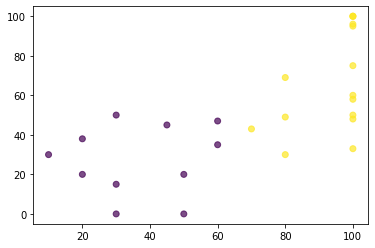

In [64]:
plt.scatter(featureAll['DB'],featureAll["AND"],\
            c=featureAll["CLUSTER"], alpha=0.7)

<AxesSubplot:xlabel='DB', ylabel='AND'>

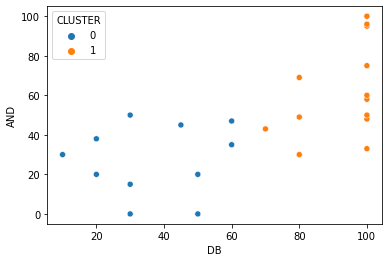

In [66]:
sns.scatterplot(x=featureAll['DB'],y=featureAll["AND"],\
               hue=featureAll["CLUSTER"])

In [57]:
# 데이터 불러오기
# 라벨링 작업을 한다...첫번째 집단 : early-bird or VIP
#                      두번째 집단 : sleepy-dog or DIAMOND
# 새로운 지도학습 모델을 적용할 수 있다.
# 클러스터링을 통해 정답지를 뽑아냈기 때문이다.
csData = \
pd.read_csv("../../stddev/dataset/kopo_customerdata.csv", encoding = "utf-8")

In [58]:
csData

,CUSTOMERCODE,STATENAME,ST,GENDER,DOB,GENDER1,EMAIL,FEST_CNT,TOTAL_AMOUNT,AC_AMOUNT,AV_AMOUNT,HA_AMOUNT,EMI_CE_AMOUNT,IS_HIGHEND,CNT_VIST,GAP_VISIT
0,1503989,State2,2,Male,0,1,1,0,30300,0,30300,0,0,0,1,0
1,1190338,State2,2,Male,0,1,0,1,46500,0,46500,0,0,0,1,0
2,1424715,State2,2,Female,0,2,0,0,22700,0,0,22700,0,0,1,0
3,2483305,State2,2,Male,0,1,0,1,31400,0,31400,0,0,0,1,0
4,1178802,State2,2,Male,0,1,0,1,44900,0,0,44900,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,465757,State1,1,Male,0,1,0,0,40600,0,40600,0,0,0,1,0
299996,1890264,State1,1,Male,0,1,0,1,48000,48000,0,0,0,0,1,0
299997,1857537,State1,1,Female,0,2,0,0,32300,0,0,32300,0,0,1,0
299998,2209324,State1,1,Male,0,1,0,1,48500,0,48500,0,0,0,1,0


C:\Users\SMART-19\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


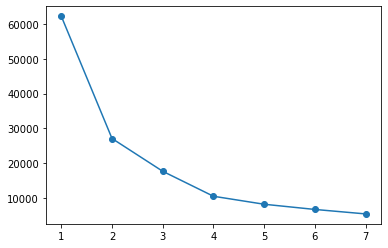

In [70]:
sse= []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse.append(km.inertia_)
plt.plot(range(1,8), sse, marker='o')